In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)

In [2]:
def ff(N, T):
    for nn in range(N):
        plt.axvline(nn/N * T, color="lightgrey", linestyle="-.")
    plt.axhline(0, color="grey")
    plt.axvline(0, color="grey", linestyle="--")
    plt.axvline(T, color="grey", linestyle="--")
    
plt.plotPeriods = ff

In [3]:
# period length [s]
T = 1

# sampled vector length (only uneven N's work lmao)
N_samples = 9

# time sampling distance
dt = T/N_samples

# continuous time, over three periods
t = np.linspace(-T,2*T,500)

# sampling positions
n = np.linspace(0, T, N_samples, endpoint=False)

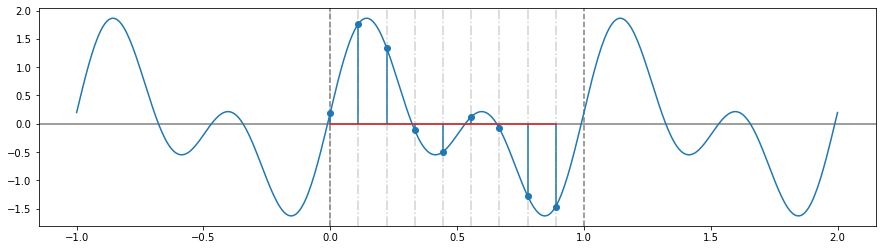

In [4]:
# 1 hertz sinus
def x_cont(t) -> np.ndarray:
    return (
        np.sin((2 * np.pi) * t / T + 0.2)
        + np.sin((2 * np.pi) * 2 * t / T)
    )

x_samples = x_cont(n)

plt.plotPeriods(N_samples, T)
plt.plot(t, x_cont(t))
plt.stem(n, x_samples)
plt.show()

In [5]:
def sinc(t: np.ndarray) -> np.ndarray:
    t = t / dt
    nenner = np.pi * t
    nenner[np.isclose(t, 0)] = 1
    result = np.sin(np.pi * t) / nenner
    result[np.isclose(t, 0)] = 1
    return result

from scipy.special import diric

def dirichlet(N_samples) -> np.ndarray:
    def f(t: np.ndarray) -> np.ndarray:
        return diric(t * 2 * np.pi, N_samples)    
    return f

def interpolation(t, x_samples, kernel) -> np.ndarray:
    out = []
    for kk in range(0, len(x_samples)):
        out.append(x_samples[kk] * kernel(t-kk*dt))
    return np.sum(np.array(out), axis=0)

looking at the sinc kernel


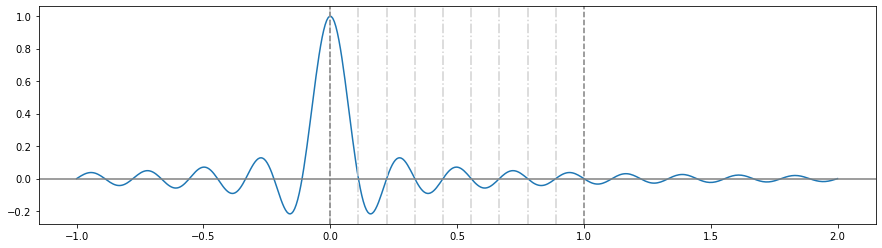

In [6]:
print("looking at the sinc kernel")

plt.plot(t, sinc(t))
plt.plotPeriods(N_samples, T)
plt.show()

looking at the diric kernel


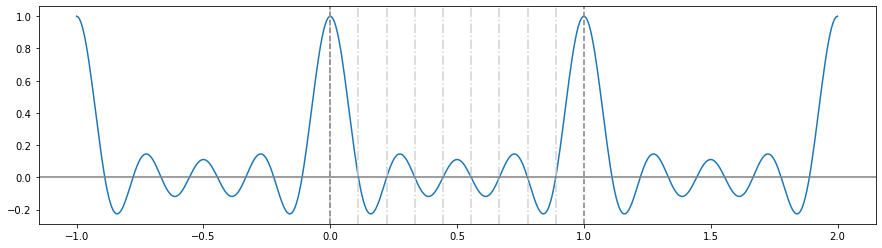

In [7]:
print("looking at the diric kernel")

plt.plot(t, dirichlet(N_samples)(t))
plt.plotPeriods(N_samples, T)
plt.show()

dirac at t = 0.33 seconds as the signal


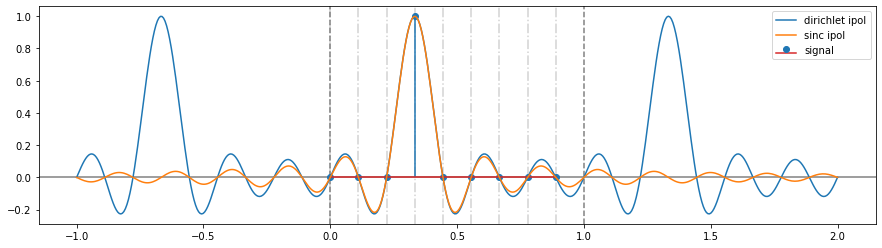

In [8]:
x_dirac = np.zeros_like(x_samples)
shift = 3
x_dirac[shift] = 1
print(f"dirac at t = {shift*dt:1.2f} seconds as the signal")

signal = x_dirac

plt.clf()
plt.plotPeriods(N_samples, T)
plt.stem(n, signal, label="signal")
plt.plot(t, interpolation(t, signal, dirichlet(N_samples)), label="dirichlet ipol")
plt.plot(t, interpolation(t, signal, sinc), label="sinc ipol")
plt.legend()
plt.show()

const as signal


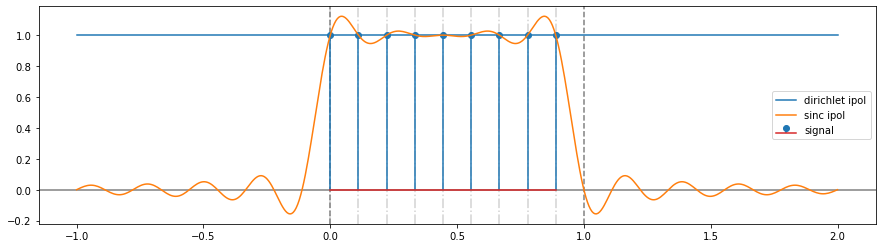

In [9]:
print("const as signal")

signal = np.ones(N_samples)

plt.clf()
plt.plotPeriods(N_samples, T)
plt.stem(n, signal, label="signal")
plt.plot(t, interpolation(t, signal, dirichlet(N_samples)), label="dirichlet ipol")
plt.plot(t, interpolation(t, signal, sinc), label="sinc ipol")

plt.legend()
plt.show()

sinusses as signal


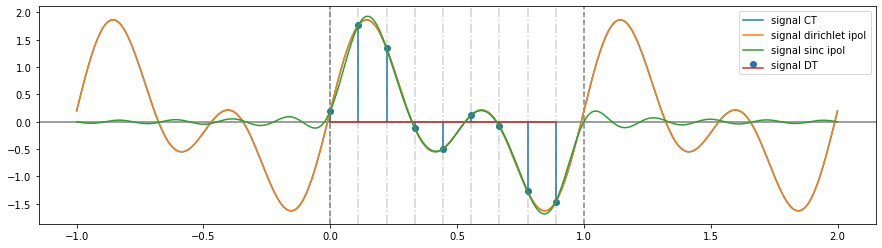

In [10]:
print("sinusses as signal")

signal = x_samples

plt.show()
plt.plotPeriods(N_samples, T)
plt.stem(n, signal, label="signal DT")
plt.plot(t, x_cont(t), label="signal CT")
plt.plot(t, interpolation(t, signal, dirichlet(N_samples)), label="signal dirichlet ipol")
plt.plot(t, interpolation(t, signal, sinc), label="signal sinc ipol")
plt.legend()
plt.show()